In [1]:
%matplotlib inline

In [2]:
import gym
import numpy as np
import random as pr
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

env = gym.make("FrozenLake-v0")

learning_rate = 0.1
input_size = env.observation_space.n
output_size = env.action_space.n
dis = .99
num_episodes = 2000

# input: 16, output: 4, bias: 4 ==> 68
model = tf.keras.Sequential([
    Dense(output_size, input_shape=[input_size],
         kernel_initializer=tf.random_uniform_initializer(minval=0,maxval=0.01)) 
])
#model.compile(optimizer="sgd", loss='mse')
opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
model.compile(optimizer=opt, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 68        
Total params: 68
Trainable params: 68
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def one_hot(x):
    return np.identity(16)[x:x+1]
    
with tf.device('/GPU:0'):
    rList=[]
    for i in range(num_episodes):
        s = env.reset()
        e = 1.0 / ((i/50)+10)
        rAll = 0
        done = False
        local_loss = []

        while not done:
            Qs = model.predict(one_hot(s))
            if np.random.rand(1) < e:
                a = env.action_space.sample()
            else:
                a = np.argmax(Qs)

            s1, reward, done, _ = env.step(a)
            if done:
                Qs[0, a] = reward
            else:
                Qs1 = model.predict(one_hot(s1))
                Qs[0, a] = reward + dis*np.max(Qs1)

            model.fit(x=one_hot(s), y=Qs, verbose=0)

            rAll += reward
            s= s1
        if i % 10 == 0:
            print(f"Episode: {i}")
            print(rAll)
        rList.append(rAll)

Episode: 0
0.0
Episode: 10
0.0
Episode: 20
0.0
Episode: 30
0.0
Episode: 40
0.0
Episode: 50
0.0
Episode: 60
0.0
Episode: 70
0.0
Episode: 80
0.0
Episode: 90
0.0
Episode: 100
0.0
Episode: 110
0.0
Episode: 120
0.0
Episode: 130
0.0
Episode: 140
0.0
Episode: 150
0.0
Episode: 160
0.0
Episode: 170
0.0
Episode: 180
0.0
Episode: 190
0.0
Episode: 200
0.0
Episode: 210
0.0
Episode: 220
0.0
Episode: 230
0.0
Episode: 240
0.0
Episode: 250
0.0
Episode: 260
0.0
Episode: 270
0.0
Episode: 280
0.0
Episode: 290
0.0
Episode: 300
1.0
Episode: 310
0.0
Episode: 320
0.0
Episode: 330
0.0
Episode: 340
0.0
Episode: 350
0.0
Episode: 360
0.0
Episode: 370
0.0
Episode: 380
0.0
Episode: 390
0.0
Episode: 400
0.0
Episode: 410
0.0
Episode: 420
1.0
Episode: 430
0.0
Episode: 440
0.0
Episode: 450
0.0
Episode: 460
0.0
Episode: 470
0.0
Episode: 480
0.0
Episode: 490
0.0
Episode: 500
0.0
Episode: 510
1.0
Episode: 520
0.0
Episode: 530
1.0
Episode: 540
0.0
Episode: 550
0.0


Percent of successful episode: 0.031%


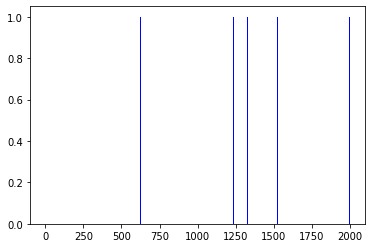

In [20]:
print("Percent of successful episode: "+str(sum(rList)/num_episodes)+"%")
plt.bar(range(len(rList)), rList, color='blue')
plt.show()